In [82]:
import numpy as np 
from matplotlib import cm
from matplotlib import pyplot as plt

In [122]:
def solve_cuadratic(a, b, c):
    
    #funcion para solucionar ecuación cuadrática
    ans1 = (-b + np.sqrt( (b**2) - 4*a*c) )/(2*a)
    ans2 = (-b - np.sqrt( (b**2) - 4*a*c) )/(2*a)

    return ans1, ans2


In [123]:
def generate_trayectory(xspeed:float, yspeed: float,
                        gravity: float, step_size_time: float):

    # calcula el tiempo de vuelo
    flight_time = max( solve_cuadratic(-gravity, yspeed, 0))*2
    
    # numero de mediciones de tiempo para completar el step_size_time deseado
    ntime = int(np.ceil(flight_time/step_size_time))

    # vector de tiempo
    time = np.linspace(0, flight_time, ntime)

    # vector de posición en y en función del tiempo
    y = 0 + (yspeed * time) - ( (gravity/2) * time**2)
    x = time * xspeed
    
    return x, y, flight_time


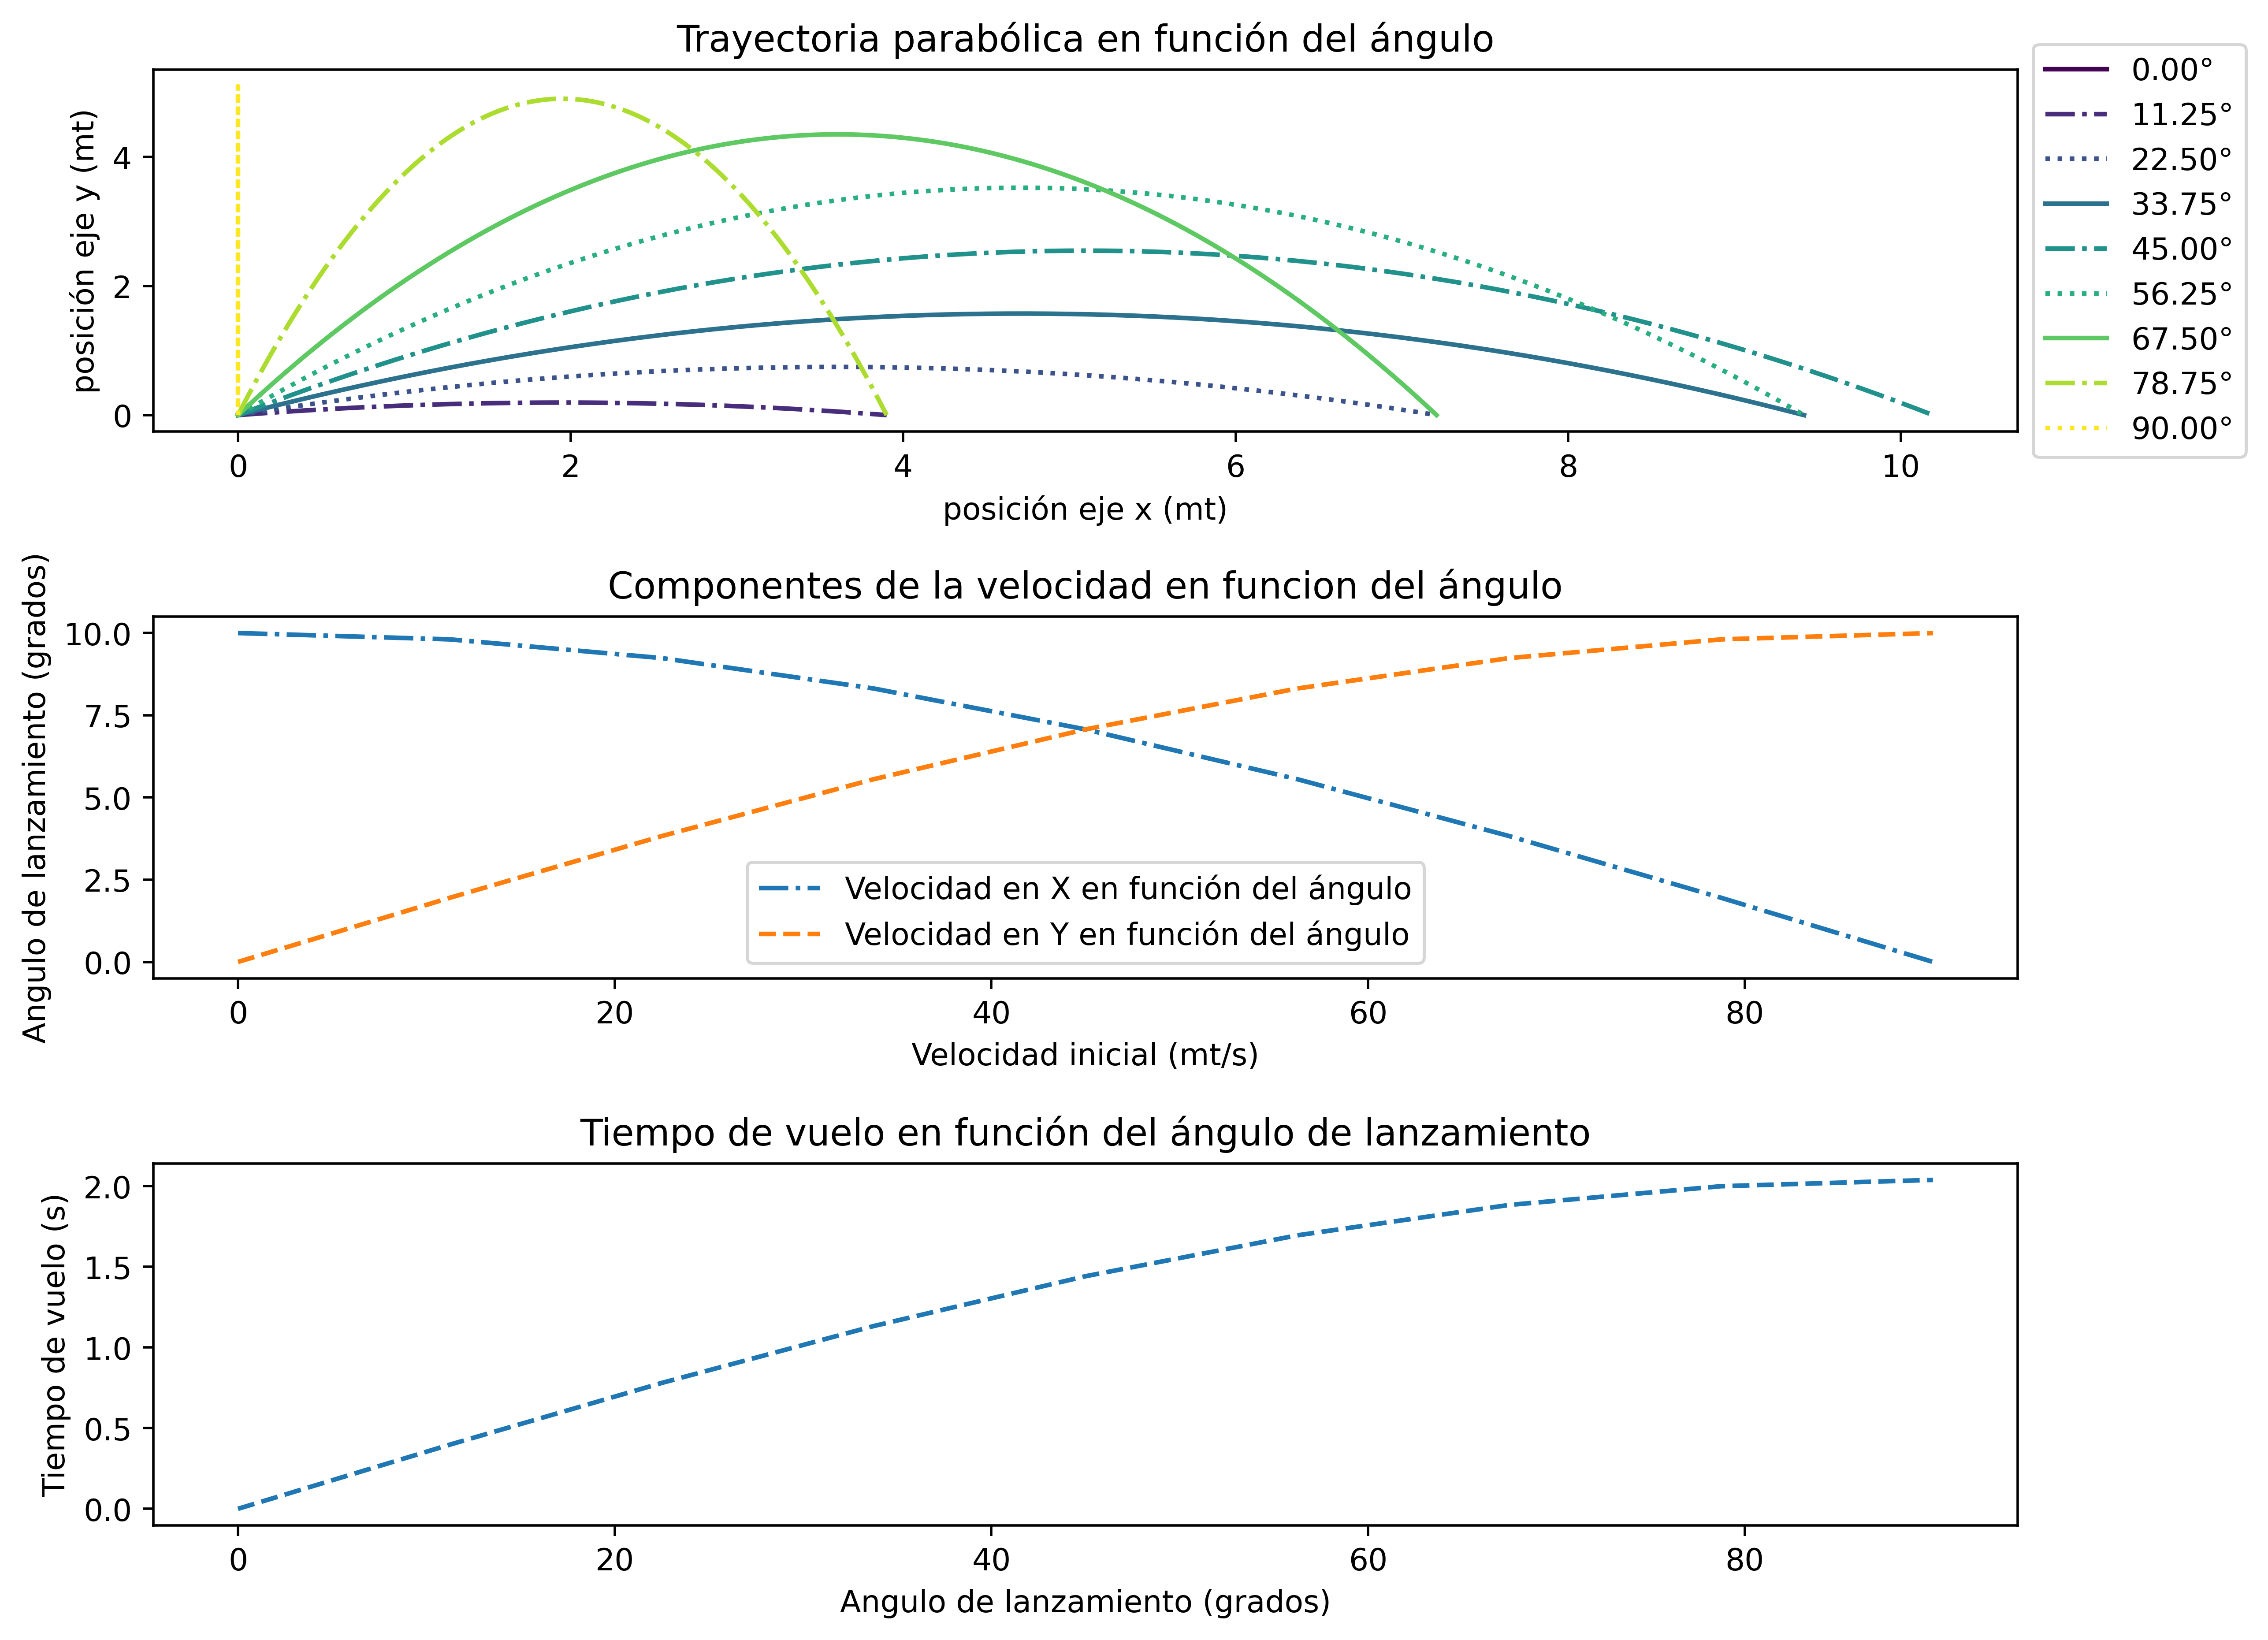

In [141]:

def parabolic_throwing(angle: tuple,  step_size_angle: float, 
                       step_size_time: float,  vi: float, gravity: float):

    #numero de angulos para completar el step_size_angle requerido
    nangles = int(np.ceil( (angle[1]- angle[0])/step_size_angle ))
    
    #vector de ángulos
    theta = np.linspace( (angle[0]*np.pi/180), (angle[1]*np.pi/180), nangles)
    
    
    #vector de velocidades iniciales en y
    vy = np.sin(theta) * vi
    #vector de velocidades iniciales en x
    vx = np.cos(theta) * vi

    #para cada velocidad inicial en x e y, hace una simulación nueva
    count = 0
    
    # hace un color map con tantos colores como ángulos distintos 
    # (esto se usará para colorear la imagen)
    viridis = cm.get_cmap('viridis', nangles)

    # estilos para la grafica
    lstyle = ['-', '-.', ':']  
    
    # crea una figura de 3 filas de subplots
    # y una sola columna
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10,8), dpi = 500)
    fig.tight_layout(pad=4)
    
    # crea la gráfica de velocidad en x e y en función del ángulo
    axs[1].plot(theta*180/np.pi, vx, 
                label = "Velocidad en X en función del ángulo",
                linestyle= '-.')
    axs[1].plot(theta*180/np.pi, vy,
                label = "Velocidad en Y en función del ángulo",
                linestyle= '--')
    axs[1].set_xlabel("Velocidad inicial (mt/s)")
    axs[1].set_ylabel("Angulo de lanzamiento (grados)")
    axs[1].legend() 
    axs[1].set_title("Componentes de la velocidad en funcion del ángulo")

    flight_times = np.zeros((1, nangles))
    
    for xspeed, yspeed in zip(vx, vy):
        
        # genera la trayectoria en x e y del proyectil
        x, y, flight_time = generate_trayectory(xspeed, yspeed,
                                                gravity, step_size_time)
        
        # crea la gráfica de tiempo de vuelo en función del ángulo
        flight_times[0, count] = flight_time        
        
        #variables para estilo del plot
        local_angle = theta[count]*180/np.pi
        color = viridis(local_angle/angle[1])
        txt = "{:.2f}°".format(local_angle)
        
        # crea la gráfica de trayectorias en función del ángulo de lanzamiento
        axs[0].plot(x, y, label= txt, c = color, linestyle= lstyle[count%3])
        axs[0].set_xlabel("posición eje x (mt)")
        axs[0].set_ylabel("posición eje y (mt)")
        axs[0].legend(loc='center left',  bbox_to_anchor=(1, 0.5)) 
        axs[0].set_title("Trayectoria parabólica en función del ángulo")

        
        count += 1

    # hace un plot de el tiempo de vuelo en función del ángulo de lanzamiento
    angle_range = theta*180/np.pi
    angle_range = angle_range.reshape((1, nangles))
    
    axs[2].plot(angle_range[0], flight_times[0], linestyle= '--')
    axs[2].set_xlabel("Angulo de lanzamiento (grados)")
    axs[2].set_ylabel("Tiempo de vuelo (s)")
    axs[2].set_title("Tiempo de vuelo en función del ángulo de lanzamiento")
        
        
parabolic_throwing(angle = (0, 90),
                   step_size_angle = 10, 
                   step_size_time = 0.005, 
                   vi = 10,
                   gravity = 9.81)
